In [2]:
%matplotlib
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

Using matplotlib backend: Qt5Agg


In [3]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [26]:
import math
import gillespy2
from gillespy2.basic_ssa_solver import BasicSSASolver

In [119]:
class DayModel(gillespy2.Model):
    def __init__(self, parameter_values=None, init_v=500):
        # initialize
        gillespy2.Model.__init__(self, name="Macrophage")
        
        # species
        S_ = gillespy2.Species(name='S_', initial_value=20000)
        M_ = gillespy2.Species(name='M_', initial_value=1e2)
        H_ = gillespy2.Species(name='H_', initial_value=0)
        
        self.add_species([S_,M_,H_])
        
        # parameters
        k2 = gillespy2.Parameter(name='k2', expression=1e-6)
        k3 = gillespy2.Parameter(name='k3', expression=0.05)
        k4 = gillespy2.Parameter(name='k4', expression=3e4)
        MuA = gillespy2.Parameter(name='MuA', expression=0.05)
        
        self.add_parameter([k2,k3,k4,MuA])
        
        # reactions
        r1 = gillespy2.Reaction(name='r1', reactants={S_:1,M_:1}, products={H_:1},
                               rate=k2)
        
        r2 = gillespy2.Reaction(name='r2', reactants={}, products = {M_:1},
                                rate=k4)
        
        r3 = gillespy2.Reaction(name='r3', reactants={M_:1}, products = {},
                                rate=MuA)
        
        r4 = gillespy2.Reaction(name='r4', reactants={H_:1}, products = {},
                                rate=k3)
        
        self.add_reaction([r1,r2,r3,r4])
        t = numpy.linspace(0,10,101)
        self.timespan(t)
        print(t)

In [120]:
model = DayModel()

[  0.    0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.    1.1
   1.2   1.3   1.4   1.5   1.6   1.7   1.8   1.9   2.    2.1   2.2   2.3
   2.4   2.5   2.6   2.7   2.8   2.9   3.    3.1   3.2   3.3   3.4   3.5
   3.6   3.7   3.8   3.9   4.    4.1   4.2   4.3   4.4   4.5   4.6   4.7
   4.8   4.9   5.    5.1   5.2   5.3   5.4   5.5   5.6   5.7   5.8   5.9
   6.    6.1   6.2   6.3   6.4   6.5   6.6   6.7   6.8   6.9   7.    7.1
   7.2   7.3   7.4   7.5   7.6   7.7   7.8   7.9   8.    8.1   8.2   8.3
   8.4   8.5   8.6   8.7   8.8   8.9   9.    9.1   9.2   9.3   9.4   9.5
   9.6   9.7   9.8   9.9  10. ]


In [121]:
%time results = model.run(solver=BasicSSASolver, show_labels=True)

Wall time: 10.2 s


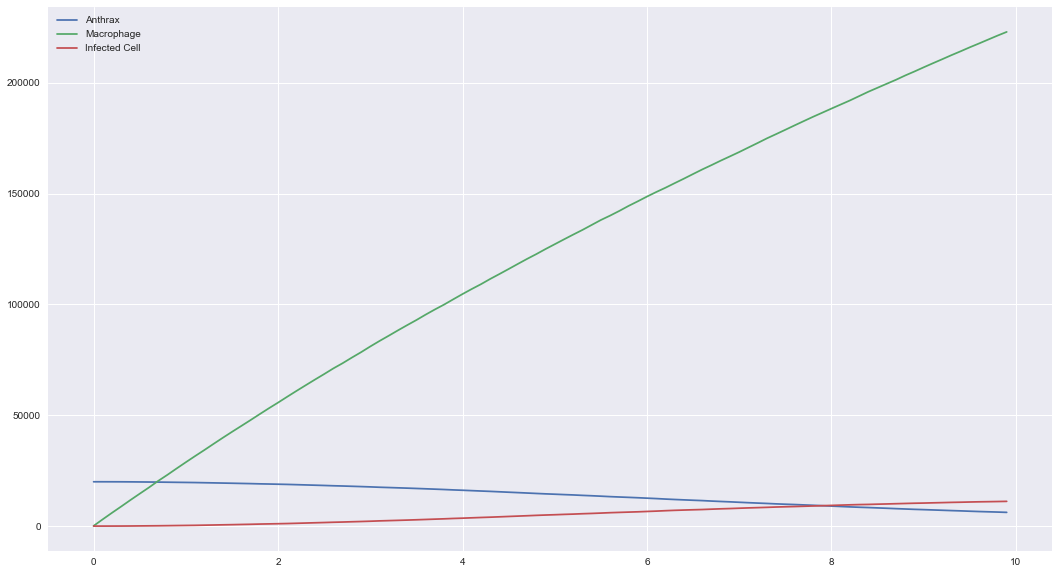

In [122]:
plt.figure(figsize=(18,10))
plt.plot(results['time'], results['S_'], label='Anthrax')
plt.plot(results['time'], results['M_'], label='Macrophage')
plt.plot(results['time'], results['H_'], label='Infected Cell')
plt.legend(loc='best')

